### HW3 计算机模拟 
**汪奕晨 3180105843**

#### 问题重述

用 Metropolis-Hasting 方法抽取服从标准正态分布的随机数：

1. 描述算法思路和步骤；

2. 给出 Python 的实现代码；

3. 进行 N > 40000 的抽取测试，并分析效果；

4. 论在实际工作中，应用此方法产生正态分布

可以直接在 Jupyer-Notebook 中完成你的作业，要求包含问题描述、必要的测试代码、结果分析、和结论。总字数不得超过2000字，总代码不得超过500行。也可以将文档和代码分成两个文件提交，文档可以是latex、pdf或markdown，代码可以是py文件。

#### 算法的思路与步骤
$$
g(\cdot | x) \sim \mathcal{U}((x-1,x+1))
$$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [6]:
def f(x): #概率密度函数，未归一化
    return np.exp(-x**2/2)

def trans(x):
    return np.random.rand()*2 - 1 + x


In [21]:
N = 100000 # 总次数
start = 10000
res = np.zeros(N) # 保存结果的向量
x = 0 #初值
for i in range(N):
    y = trans(x)
    h = np.min([1, f(y)/f(x)])
    u = np.random.rand()
    if u < h:
        x = y
    res[i] = x

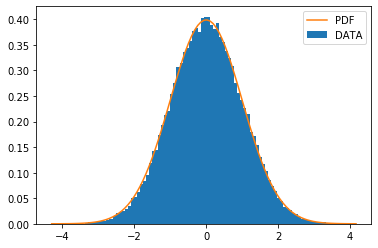

In [22]:
# 绘制模块
num = plt.hist(res[start:], bins = 100, normed = 1, label='DATA')
y = 1/np.sqrt(2*np.pi) * f(num[1]) 
plt.plot(num[1], y, label = 'PDF')
plt.legend()
plt.show()

In [23]:
print(stats.shapiro(res[start:]))
print(stats.kstest(res[start:], 'norm'))
print(stats.normaltest(res[start:]))


(0.9999424815177917, 0.08482585102319717)
KstestResult(statistic=0.005204338438387274, pvalue=0.015265220490382219)
NormaltestResult(statistic=2.597094146441726, pvalue=0.2729280495704365)
